# Right Angle Robot
Before we jump into trigonometry, I want to familiarize you with the Vehicle class you'll be using in this lesson (and get you thinking about motion in general).

In this notebook you will complete a `Vehicle` class by filling out two methods: `drive_forward` and `turn_right`. 

Note that this version of a Vehicle class can ONLY face in one of 4 directions: (E)ast, (N)orth, (W)est, or (S)outh. The vehicle's current direction is stored in its `heading` property.

When you've implemented the two methods below you can run the testing cells at the bottom of the Notebook to ensure everything is behaving as expected.

### TODO - Implement  `drive_forward` and `turn_right`
**Solution code is provided in the next notebook.**

In [1]:
from matplotlib import pyplot as plt

class Vehicle:
    def __init__(self):
        """
        Creates new vehicle at (0,0) with a heading pointed East.
        """
        self.x       = 0 # meters
        self.y       = 0
        self.heading = "E" # Can be "N", "S", "E", or "W"
        self.history = []
        
    # TODO-1 - Implement this function 
    def drive_forward(self, displacement):
        """
        Updates x and y coordinates of vehicle based on 
        heading and appends previous (x,y) position to
        history.
        """
        
        # this line appends the current (x,y) coordinates
        # to the vehicle's history. Useful for plotting 
        # the vehicle's trajectory. You shouldn't need to
        # change this line.
        self.history.append((self.x, self.y))
        
        # vehicle currently pointing east...
        if self.heading == "E":
            self.x += displacement
        
        # north
        elif self.heading == "N":
            self.y += displacement
        
        # west
        elif self.heading == "W":
            self.x -= displacement
        
        # south
        else:
            self.y -= displacement
        
    def turn(self, direction):
        if direction == "L":
            self.turn_left()
        elif direction == "R":
            self.turn_right()
        else:
            print("Error. Direction must be 'L' or 'R'")
            return
        
    def turn_left(self):
        """
        Updates heading (for a left turn) based on current heading
        """
        next_heading = {
            "N" : "W",
            "W" : "S",
            "S" : "E",
            "E" : "N",
        }
        self.heading = next_heading[self.heading]
        
    
    # TODO-2 - implement this function
    def turn_right(self):
        """
        Updates heading (for a right turn) based on current heading
        """
        next_heading = {
            "N" : "E",
            "E" : "S",
            "S" : "W",
            "W" : "N",
        }
        self.heading = next_heading[self.heading]
    
    def show_trajectory(self):
        """
        Creates a scatter plot of vehicle's trajectory.
        """
        X = [p[0] for p in self.history]
        Y = [p[1] for p in self.history]
        
        X.append(self.x)
        Y.append(self.y)
        
        plt.scatter(X,Y)
        plt.plot(X,Y)
        plt.show()

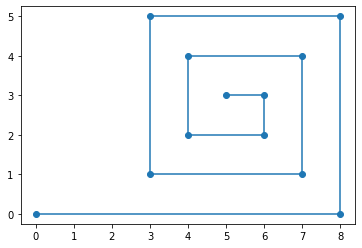

Nice job! Your vehicle is behaving as expected!


In [2]:
# TESTING CODE 1

# instantiate vehicle
v = Vehicle()

# drive in spirals of decreasing size
v.drive_forward(8)
v.turn("L")

v.drive_forward(5)
v.turn("L")

v.drive_forward(5)
v.turn("L")

v.drive_forward(4)
v.turn("L")

v.drive_forward(4)
v.turn("L")

v.drive_forward(3)
v.turn("L")

v.drive_forward(3)
v.turn("L")

v.drive_forward(2)
v.turn("L")

v.drive_forward(2)
v.turn("L")

v.drive_forward(1)
v.turn("L")

v.drive_forward(1)

# show the trajectory. It should look like a spiral
v.show_trajectory()

# TESTING
assert(v.x == 5)
assert(v.y == 3)
first_5 = [
    (0, 0),
    (8, 0),
    (8, 5),
    (3, 5),
    (3, 1)
]
assert(first_5 == v.history[:5])
print("Nice job! Your vehicle is behaving as expected!")

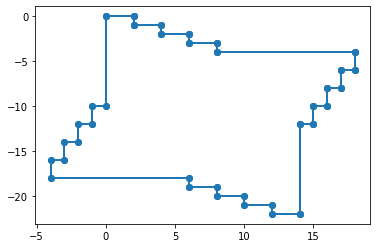

Nice job! Your vehicle passed the zig zag test.


In [3]:
# TESTING CODE Part 2
def test_zig_zag():
    v = Vehicle()
    for i in range(10):
        for _ in range(4):
            v.drive_forward(2)
            v.turn("R")
            v.drive_forward(1)
            v.turn("L")
        v.drive_forward(10)
        v.turn("R")
    first_six = [
        (0,0),
        (2,0),
        (2,-1),
        (4,-1),
        (4,-2),
        (6,-2)
    ]
    v.show_trajectory()
    assert(v.x == 14)
    assert(v.y == -22)
    assert(v.history[:6] == first_six)
    print("Nice job! Your vehicle passed the zig zag test.")
test_zig_zag()

## What's Next?

We want to be able to keep track of vehicle trajectory for ANY heading, not just the four compass directions. 